# Credit Card Lead Prediction

## Problem Statement
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Table of Content
-   **Step 1 : Importing Relevent Libraries**
-   **Step 2 : Data Inspection**
-   **Step 3 : Data Cleaning**
-   **Step 4 : Exploratory Data Analysis**
-   **Step 5 : Feature Selection**
-   **Step 6 : Setting Up Validation Stratergy**
-   **Step 7 : Building Model**
-   **Step 8 : Submission**

### Step 1 : Importing Relevent Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2 : Data Inspection

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

train.shape, test.shape

((245725, 11), (105312, 10))

-      **We Have 2,45,725 rows and 11 columns in Training Dataset wherease 1,05,312 rows and 10 columns in Test Dataset**

In [3]:
#Ratio of Null Values in Percent
(train.isnull().sum()/train.shape[0]) * 100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [4]:
#Ratio of Null Values in Percent
(test.isnull().sum()/test.shape[0]) * 100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

-   **We Have approx 12% Null Values in Both Test and Train Datasets**

In [5]:
# Categorical Features in Dataset [Train Dataset]
categorical = train.select_dtypes(include=[np.object])
print("Categorical Features in Train Dataset : {}".format(categorical.shape[1]))

numerical = train.select_dtypes(include=[np.int64, np.float64])
print("Numerical Features in Train Dataset : {}".format(numerical.shape[1]))


Categorical Features in Train Dataset : 7
Numerical Features in Train Dataset : 4


In [6]:
# Categorical Features in Dataset [Test Dataset]
categorical = test.select_dtypes(include=[np.object])
print("Categorical Features in Test Dataset : {}".format(categorical.shape[1]))

numerical = test.select_dtypes(include=[np.int64, np.float64])
print("Numerical Features in Test Dataset : {}".format(numerical.shape[1]))


Categorical Features in Test Dataset : 7
Numerical Features in Test Dataset : 3


### Step 3: Data Cleaning

Credit_Product which is categorical feature in dataset in missing. These Missing Values can affect our model as it can lead us to biased Model. Biased Model is caused due to not analysing behaviour or relationship of missing values to the other features. We will end up with wrong predictions. 

In [7]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [9]:
train.Credit_Product.unique()

array(['No', nan, 'Yes'], dtype=object)

-  **As Credit_Product is Categorical value so we can try approach to fill na values with mode values**

In [10]:
print(train['Credit_Product'].value_counts())
print('******************************************')
print(test['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
******************************************
No     61608
Yes    31182
Name: Credit_Product, dtype: int64


In [11]:
train['Credit_Product'] = train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product'] = test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])


In [12]:
train['Credit_Product'].isnull().sum(), test['Credit_Product'].isnull().sum()

(0, 0)

__We Have Succesfully Filled all na values with mode values__

### Step 4: Exploratory Data Analysis

In [13]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [14]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

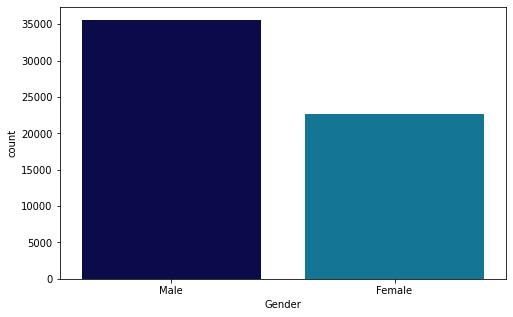

In [15]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train[train['Is_Lead'] == 1],palette='ocean')

__Male are more keen to take credit card instead of Females__

<AxesSubplot:xlabel='Age'>

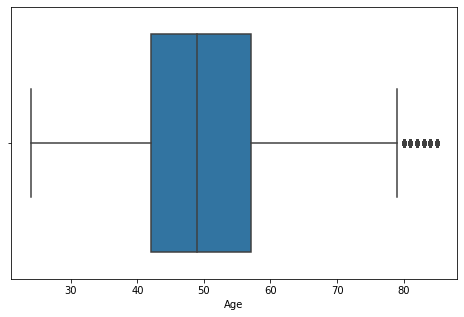

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot( 'Age',data=train[train['Is_Lead'] == 1])

__Though there are some outliers present but major leads are between the age of 40 to 60__

<AxesSubplot:xlabel='Occupation', ylabel='count'>

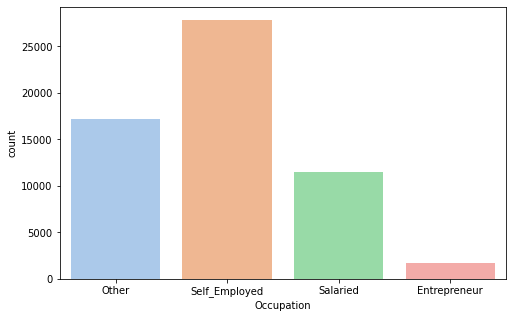

In [17]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train[train['Is_Lead'] == 1],palette='pastel')

__Self Employed are more keen to buy Credit Card__

<AxesSubplot:xlabel='Vintage'>

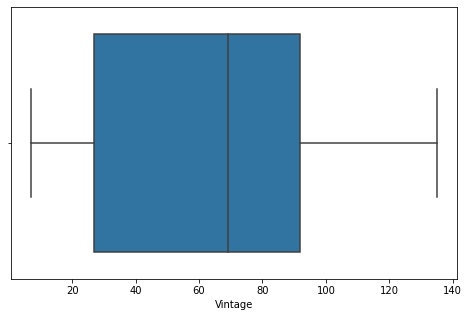

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Vintage',data=train[train['Is_Lead'] == 1])

__as Median Suggest 70 months old customers are more keen to buy credit card__

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

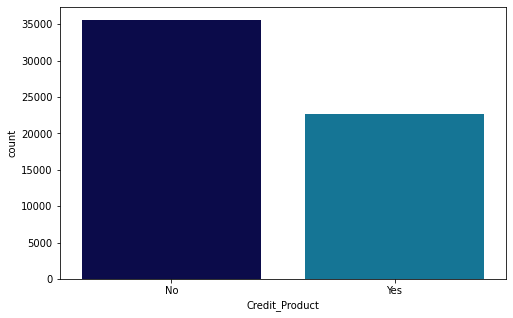

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train[train['Is_Lead'] == 1],palette='ocean')

__If the Person has no active credit product then he is more interested in Credit Card__

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

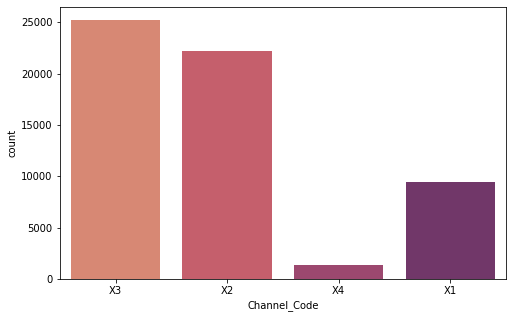

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train[train['Is_Lead'] == 1],palette='flare')

__X3 & X2 Aquistion Channels are generating more leads__

<AxesSubplot:xlabel='Avg_Account_Balance'>

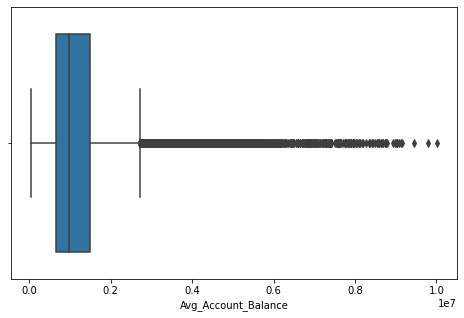

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Avg_Account_Balance',data=train[train['Is_Lead'] == 1])


__Average Account Balance 1L in Last 12 month are best Leads For Credit Card__

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

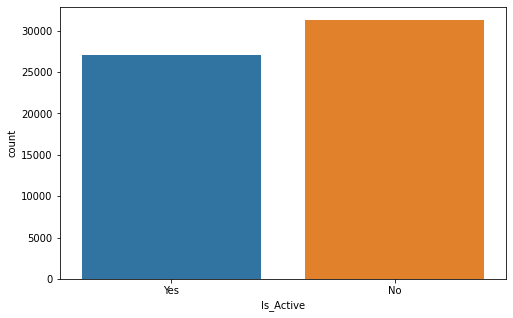

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train[train['Is_Lead'] == 1],palette='tab10')

__Customers not active from last 3 months are more interested in Credit Card__

### Step 5 : Feature Selection

In [23]:
#Encoding Categorical Labels
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [24]:
X = train.drop(columns=['ID','Is_Lead'],axis=1)
y = train['Is_Lead']

In [25]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [26]:
X_test = test.drop(columns=['ID'],axis =1)

### Step 6 : Setting Up Validation Stratergy

In [27]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, X_val, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled
  
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_valid, X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [29]:
def model_score(model_name, model, X_train_scaled, X_val_scaled, y_train, y_val, test=False):
    """
    Input: Transformed feature and target sets
    Output: Validation scores. If test=True, includes test scores
    """
    print('Calculating validation score...')

    my_model = model
    my_model.fit(X_train_scaled,y_train)
    print(f'{model_name} accuracy score: {my_model.score(X_val_scaled,y_val):.4}\n')
    print('ROC', roc_auc_score(y_valid,my_model.predict_proba(X_val_scaled).T[1]))

    # if test:
    #     print("Calculating test score...")
    #     print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.4}\n')

    return my_model
  
knn = model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

rf = model_score('RF', RandomForestClassifier(),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)
        
gbm = model_score('XGBoost', XGBClassifier(),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

Calculating validation score...
KNN accuracy score: 0.7649

ROC 0.7104267712212682
Calculating validation score...
LogReg accuracy score: 0.7546

ROC 0.715694142968775
Calculating validation score...
RF accuracy score: 0.7775

ROC 0.7560527618090643
Calculating validation score...
[10:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 0.7915

ROC 0.7856499322023245


### Step 7 : Building Model

In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter values that should be searched
bootstrap = [True, False]
max_features = ['auto','sqrt']
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [200, 400, 500, 700]
max_depth = [4,6,10,12, None]

# Specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_estimators=n_estimators, max_depth = max_depth, bootstrap=bootstrap,
                  min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,
                  max_features=max_features)
rand = RandomizedSearchCV(XGBClassifier(), param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=42)

rand.fit(X_train_scaled, y_train)
print(rand.best_params_)

[10:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[11:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[11:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:23:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[11:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[12:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[12:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[12:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[12:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[13:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

[13:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to som

In [37]:
gbm2 = model_score('XGBoost', XGBClassifier(n_estimators=200,min_samples_split=5,
                                            min_samples_leaf=2,max_features='sqrt',
                                            max_depth=None, bootstrap=True),
                       X_train_scaled,X_val_scaled, y_train, y_valid,test=False)

Calculating validation score...
[14:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 0.7902

ROC 0.7829067189061394


### Step 8 : Submission

In [32]:
sample = pd.read_csv('sample_submission_eyYijxG.csv')


In [35]:
finalPred2 = gbm2.predict_proba(X_test_scaled).T[1]
sample['Is_Lead'] = finalPred2
sample.to_csv('my_submissionXGB2.csv',index=False)